## Loading Dataset

In [1]:
import pandas as pd
df=pd.read_csv("../data/PCOS_data.csv")
print(df.head())

   Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
0       1             10001           0                    1.99   
1       2             10002           0                   60.80   
2       3             10003           1                  494.08   
3       4             10004           0                    1.99   
4       5             10005           0                  801.45   

   II    beta-HCG(mIU/mL) AMH(ng/mL)  
0                    1.99       2.07  
1                    1.99       1.53  
2                  494.08       6.63  
3                    1.99       1.22  
4                  801.45       2.26  


In [2]:
print("Shape of the dataset:",df.shape)

print("\nData Info:")
print(df.info())

Shape of the dataset: (541, 6)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3     I   beta-HCG(mIU/mL)  541 non-null    float64
 4   II    beta-HCG(mIU/mL)  541 non-null    float64
 5   AMH(ng/mL)              541 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 25.5+ KB
None


In [3]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
           Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
count  541.000000        541.000000  541.000000              541.000000   
mean   271.000000      10271.000000    0.327172              664.549235   
std    156.317519        156.317519    0.469615             3348.920576   
min      1.000000      10001.000000    0.000000                1.300000   
25%    136.000000      10136.000000    0.000000                1.990000   
50%    271.000000      10271.000000    0.000000               20.000000   
75%    406.000000      10406.000000    1.000000              297.210000   
max    541.000000      10541.000000    1.000000            32460.970000   

       II    beta-HCG(mIU/mL)  
count              541.000000  
mean               238.229518  
std               1603.826221  
min                  0.110417  
25%                  1.990000  
50%                  1.990000  
75%                 97.630000  
max              25000.000000  


In [4]:
print("\nMissing values in each column")
print(df.isnull().sum())


Missing values in each column
Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
AMH(ng/mL)                0
dtype: int64


In [5]:
print("\nTarget Variable Distribution:")
print(df['PCOS (Y/N)'].value_counts())


Target Variable Distribution:
PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64


In [6]:
with open("eda_summary.txt","w") as f:
    df.info(buf=f)
    f.write("\n\n")
    f.write(str(df.describe()))
    f.write("\n\n")
    f.write("Missing Values:\n")
    f.write(str(df.isnull().sum()))

## Data Cleaning

In [7]:
import pandas as pd
#droping the null values if any
print(df.isnull().sum())

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
AMH(ng/mL)                0
dtype: int64


In [8]:
df.dropna(inplace=True)

In [9]:
#droping irrevalent columns
df.drop(columns=['Sl._No','Patient File No.'],inplace=True,errors='ignore')
df.columns


Index(['Sl. No', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'],
      dtype='object')

In [10]:
#strip spaces and fix column names
df.columns = df.columns.str.strip().str.replace(r'\s+', '_', regex=True)

print("Cleaned column names:")
print(df.columns)

Cleaned column names:
Index(['Sl._No', 'PCOS_(Y/N)', 'I_beta-HCG(mIU/mL)', 'II_beta-HCG(mIU/mL)',
       'AMH(ng/mL)'],
      dtype='object')


In [11]:
df.to_csv('processed_data.csv', index=False)
print("✅ Cleaned dataset saved as 'processed_data.csv'")

✅ Cleaned dataset saved as 'processed_data.csv'


## EDA(Exploratory Data Analysis)

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = df.drop(columns=['Sl._No'])

In [14]:
print(df.dtypes)

PCOS_(Y/N)               int64
I_beta-HCG(mIU/mL)     float64
II_beta-HCG(mIU/mL)    float64
AMH(ng/mL)              object
dtype: object


In [15]:
df['AMH(ng/mL)'] = pd.to_numeric(df['AMH(ng/mL)'], errors='coerce')
df.dropna(inplace=True)
df['AMH(ng/mL)'] = df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].mean())

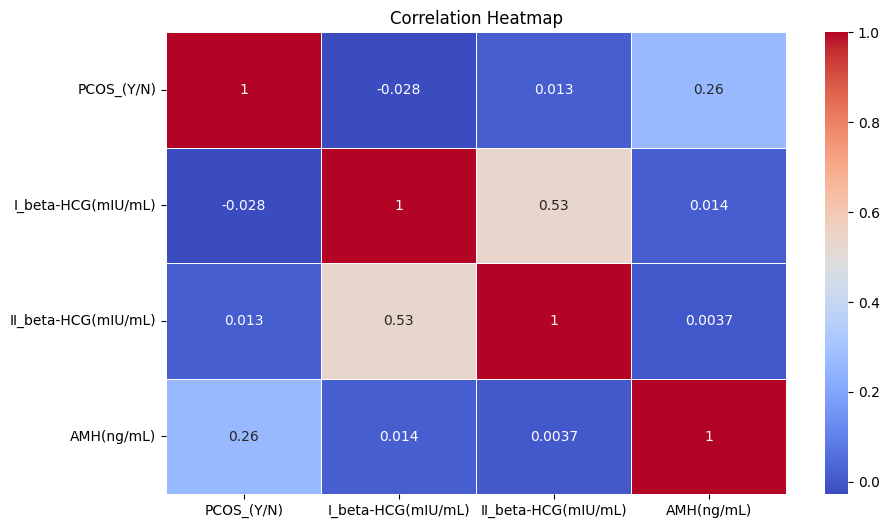

In [16]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
df.columns

Index(['PCOS_(Y/N)', 'I_beta-HCG(mIU/mL)', 'II_beta-HCG(mIU/mL)',
       'AMH(ng/mL)'],
      dtype='object')

In [18]:
df.columns=[col.strip() for col in df.columns]
df.rename(columns={
    'PCOS_(Y/N)':'PCOS',
    'I_beta-HCG(mIU/mL)': 'Beta_HCG_1',
    'II_beta-HCG(mIU/mL)':'Beta_HCG_2',
    'AMH(ng/mL)':'AMH'
},inplace=True)
    

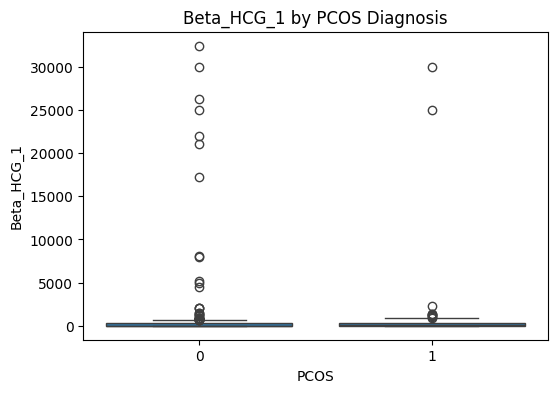

<Figure size 640x480 with 0 Axes>

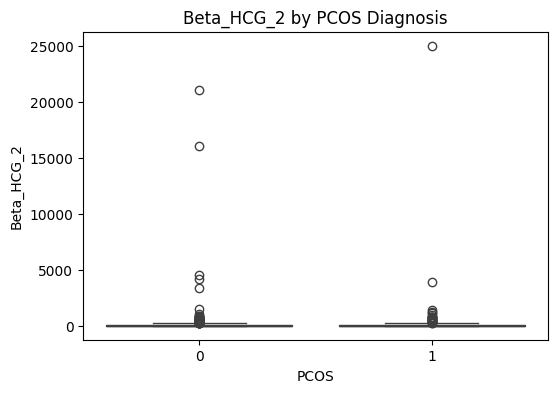

<Figure size 640x480 with 0 Axes>

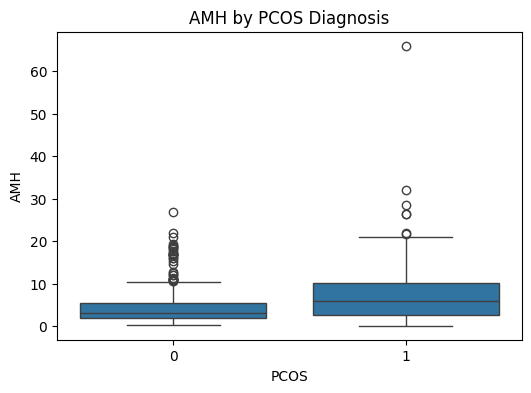

<Figure size 640x480 with 0 Axes>

In [19]:
#Boxplot for PCOS Diagnosis
features=['Beta_HCG_1','Beta_HCG_2','AMH']

for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='PCOS',y=feature,data=df)
    plt.title(f'{feature} by PCOS Diagnosis')
    plt.show()
    plt.savefig('plot_name.png')  # Use inside any plot to save them

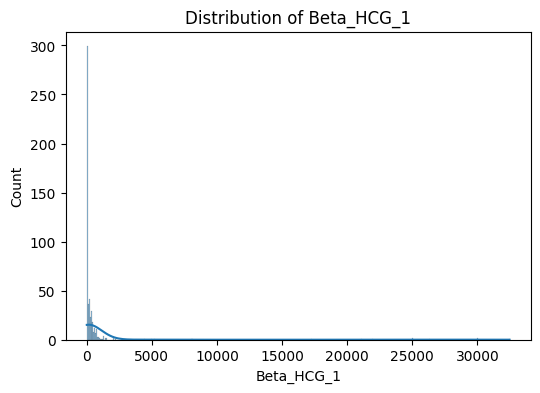

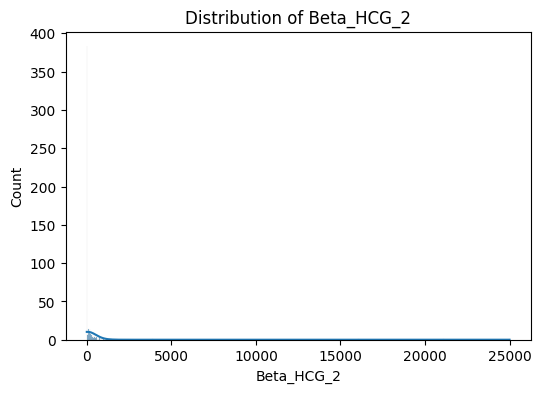

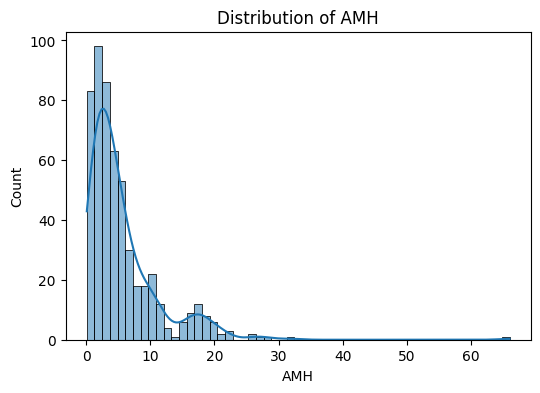

In [20]:
# Distribution plots for continuous features
for feature in ['Beta_HCG_1', 'Beta_HCG_2', 'AMH']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.savefig('plot_name.png')  # Use inside any plot to save them
    plt.show()



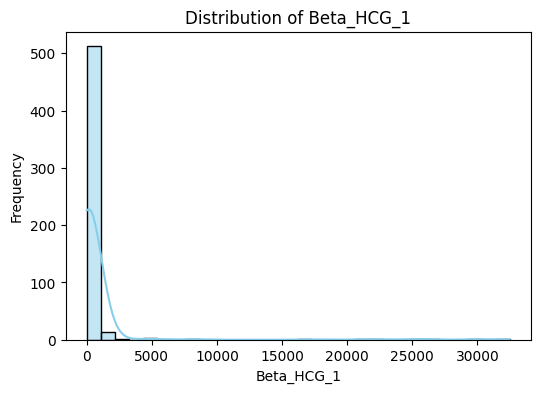

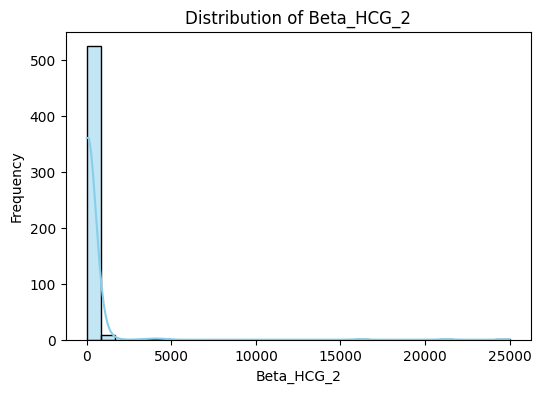

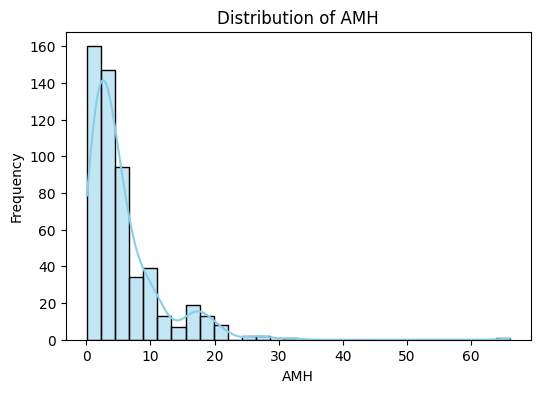

In [21]:
# Distribution Plots (Histogram + KDE)
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Beta_HCG_1','Beta_HCG_2','AMH']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    
    # Save plot
    filename = f"{feature.replace('/', '_').replace(' ', '_')}_distribution.png"
    plt.savefig(filename)
    plt.show()


## Feature Engineering + Preprocessing

In [22]:
from sklearn.preprocessing import StandardScaler
import joblib

In [23]:
# Remove any true duplicate columns
df=df.loc[:,~df.columns.duplicated()]

In [24]:
df.columns

Index(['PCOS', 'Beta_HCG_1', 'Beta_HCG_2', 'AMH'], dtype='object')

In [25]:
#Correlation with target
correlation=df.corr()['PCOS'].abs().sort_values(ascending=False)

In [26]:
# Select top 15 features excluding target
top_features=correlation[1:16].index.tolist()
print("Top 15 correlated features:\n",top_features)

Top 15 correlated features:
 ['AMH', 'Beta_HCG_1', 'Beta_HCG_2']


In [27]:
#Final dataframe with selected features + target
df_selected=df[top_features+['PCOS']]

In [28]:
#Check for categorical columns (if any)
cat_cols=df_selected.select_dtypes(include='object').columns.tolist()
if cat_cols:
    df_selected=pd.get_dummies(df_selected,columns=cat_cols)

In [29]:
#Split into features (X) and target (y)
X=df_selected.drop('PCOS',axis=1)
y=df_selected['PCOS']

In [30]:
#Standardize numerical features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [31]:
#Save the scaler for deployment 
joblib.dump(scaler,'scaler_pcod.joblib')

['scaler_pcod.joblib']

In [32]:
#Save the preprocessed dataset (optional)
X_scaled_df=pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['Target']=y.values
X_scaled_df.to_csv("processed_PCOS_data.csv",index=False)

In [34]:
from sklearn.model_selection import train_test_split
X=X_scaled_df.drop('Target',axis=1)
y=X_scaled_df['Target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## MODEL TRAINING Baseline Models

###### Train Baseline Model

#### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

#### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

#### XGBoost

In [38]:
from xgboost import XGBClassifier
xgb=XGBClassifier(eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

###### Evaluation: Accuracy and F1-Score

In [39]:
from sklearn.metrics import accuracy_score, f1_score
models={'LogesticRegression':lr, 'RandomForest':rf, 'XGBoost':xgb}

for name,model in models.items():
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    print(f"{name}- Accuracy: {acc:.4f},F1-Score:{f1:.4f}")
    

LogesticRegression- Accuracy: 0.7037,F1-Score:0.2381
RandomForest- Accuracy: 0.6574,F1-Score:0.3729
XGBoost- Accuracy: 0.6944,F1-Score:0.4000


###### Confusion Matrix

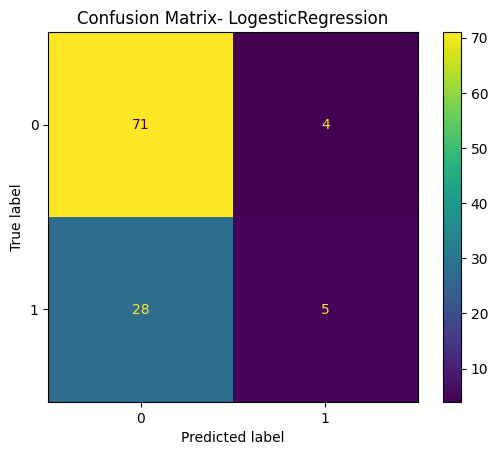

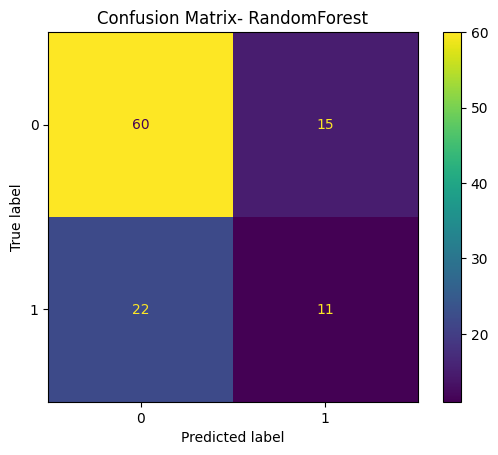

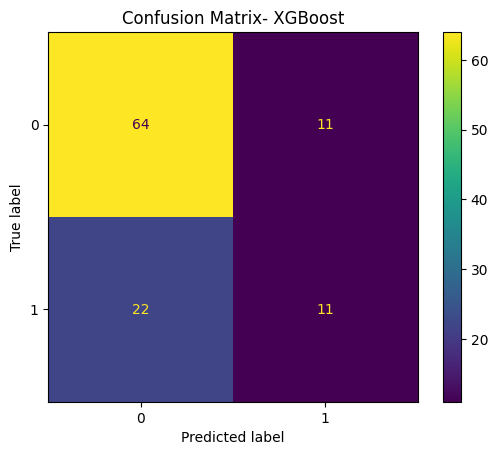

In [40]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

for name,model in models.items():
    y_pred=model.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    disp=ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix- {name}")
    plt.show()

######  Store results in a DataFrame

In [41]:
import pandas as pd
results=[]
for name,model in models.items():
    y_pred=model.predict(X_test)
    results.append({
    'Model':name,
    'Accuracy':accuracy_score(y_test,y_pred),
    'F1 Score':f1_score(y_test,y_pred)
    })

results_df=pd.DataFrame(results)
print(results_df)

                Model  Accuracy  F1 Score
0  LogesticRegression  0.703704  0.238095
1        RandomForest  0.657407  0.372881
2             XGBoost  0.694444  0.400000
